In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.patches as mpatches
    
columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv(r"D:\AI WORKSHOP\TASK\PCA_TASK\wdbc.data", header=None, names=columns)
df.drop("ID", axis=1, inplace=True)
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)


In [7]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)


Shape after PCA: (569, 10)


In [18]:
pca10 = PCA(n_components=10)
X_pca10 = pca10.fit_transform(X_scaled)
loadings = pd.DataFrame(
    pca10.components_.T,  
    columns=[f'PC{i+1}' for i in range(10)],
    index=X.columns      
)
print(loadings)


                              PC1       PC2       PC3       PC4       PC5  \
radius_mean              0.218902 -0.233857 -0.008531 -0.041409 -0.037786   
texture_mean             0.103725 -0.059706  0.064550  0.603050  0.049469   
perimeter_mean           0.227537 -0.215181 -0.009314 -0.041983 -0.037375   
area_mean                0.220995 -0.231077  0.028700 -0.053434 -0.010331   
smoothness_mean          0.142590  0.186113 -0.104292 -0.159383  0.365089   
compactness_mean         0.239285  0.151892 -0.074092 -0.031795 -0.011704   
concavity_mean           0.258400  0.060165  0.002734 -0.019123 -0.086375   
concave_points_mean      0.260854 -0.034768 -0.025564 -0.065336  0.043861   
symmetry_mean            0.138167  0.190349 -0.040240 -0.067125  0.305941   
fractal_dimension_mean   0.064363  0.366575 -0.022574 -0.048587  0.044424   
radius_se                0.205979 -0.105552  0.268481 -0.097941  0.154456   
texture_se               0.017428  0.089980  0.374634  0.359856  0.191651   

In [ ]:
for pc in loadings.columns:
    print(f"\nTop 5 features for {pc}:")
    top5 = loadings[pc].abs().sort_values(ascending=False).head(5)
    for feature, value in top5.items():
        print(f"  {feature}: {loadings.loc[feature, pc]:.4f}")



Top 5 features for PC1:
  concave_points_mean: 0.2609
  concavity_mean: 0.2584
  concave_points_worst: 0.2509
  compactness_mean: 0.2393
  perimeter_worst: 0.2366

Top 5 features for PC2:
  fractal_dimension_mean: 0.3666
  fractal_dimension_se: 0.2801
  fractal_dimension_worst: 0.2753
  radius_mean: -0.2339
  compactness_se: 0.2327

Top 5 features for PC3:
  texture_se: 0.3746
  smoothness_se: 0.3088
  symmetry_se: 0.2886
  symmetry_worst: -0.2713
  radius_se: 0.2685

Top 5 features for PC4:
  texture_worst: 0.6328
  texture_mean: 0.6031
  texture_se: 0.3599
  smoothness_mean: -0.1594
  area_se: -0.1082

Top 5 features for PC5:
  smoothness_mean: 0.3651
  concavity_se: -0.3540
  smoothness_worst: 0.3244
  symmetry_mean: 0.3059
  compactness_se: -0.2800

Top 5 features for PC6:
  symmetry_worst: 0.4989
  symmetry_se: 0.4902
  smoothness_worst: -0.3693
  symmetry_mean: 0.3565
  smoothness_se: -0.3429

Top 5 features for PC7:
  fractal_dimension_worst: 0.3747
  concave_points_se: -0.3696

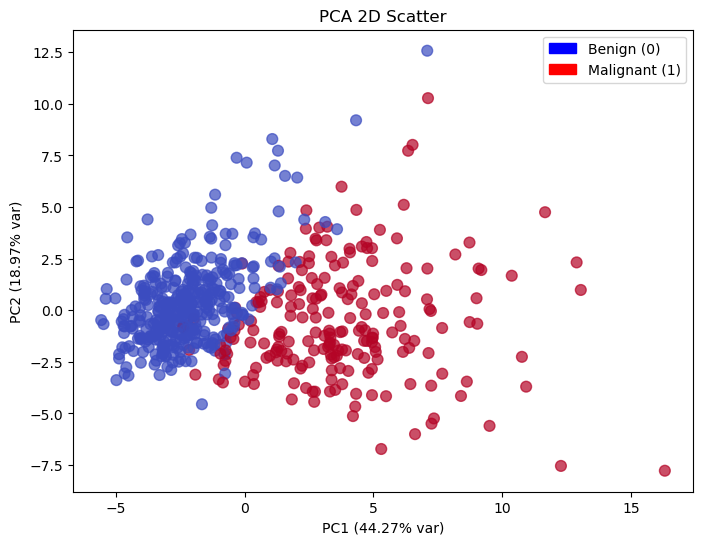

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1],c=y,cmap="coolwarm", s=60,alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Scatter")
blue_patch = mpatches.Patch(color="blue", label="Benign (0)")
red_patch = mpatches.Patch(color="red", label="Malignant (1)")
plt.legend(handles=[blue_patch, red_patch])
plt.show()


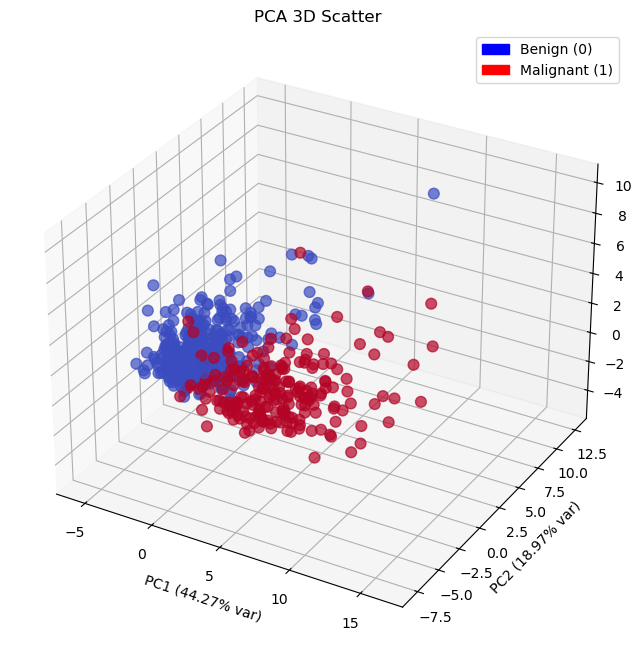

In [40]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=y, cmap="coolwarm", s=60, alpha=0.7)
plt.xlabel(f"PC1 ({pca3.explained_variance_ratio_[0]*100:.2f}% var)")
plt.ylabel(f"PC2 ({pca3.explained_variance_ratio_[1]*100:.2f}% var)")
ax.set_title("PCA 3D Scatter")
ax.legend(handles=[blue_patch, red_patch])
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA()
pca.fit(scaled_data)
evr = pca.explained_variance_ratio_


evr_10 = evr[:10]
cumulative_var_10 = np.cumsum(evr_10)

print("Explained Variance Ratio:", evr_10)
print("Cumulative Explained Variance:", cumulative_var_10.sum())

Explained Variance Ratio (first 10 PCs): [0.44896035 0.18472104 0.09183385 0.06446333 0.05351866 0.03895187
 0.02208771 0.0156405  0.01344822 0.01131915]
Cumulative Explained Variance (first 10 PCs): 8.027366260887145


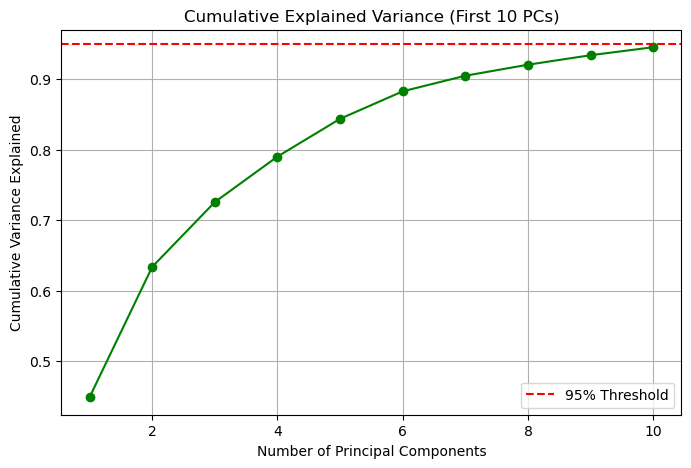

In [31]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), cumulative_var_10, marker='o', linestyle='-', color='g')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Threshold")
plt.title("Cumulative Explained Variance (First 10 PCs)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.legend()
plt.grid(True)
plt.show()


In [34]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_curve, auc
X_train, X_test, y_train, y_test = train_test_split(X_pca3, y, test_size=0.2, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.956140350877193
Precision: 0.9743589743589743
Recall: 0.9047619047619048
F1 Score: 0.9382716049382716


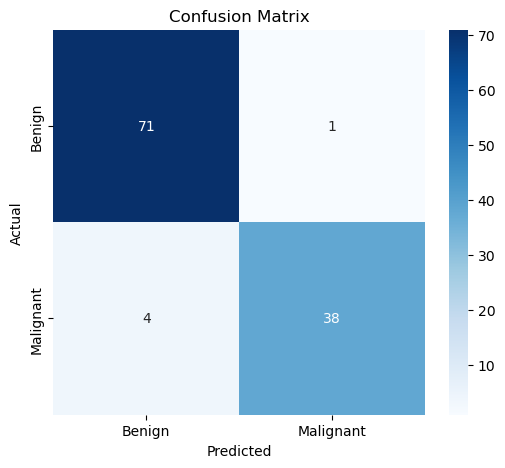

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign","Malignant"], yticklabels=["Benign","Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

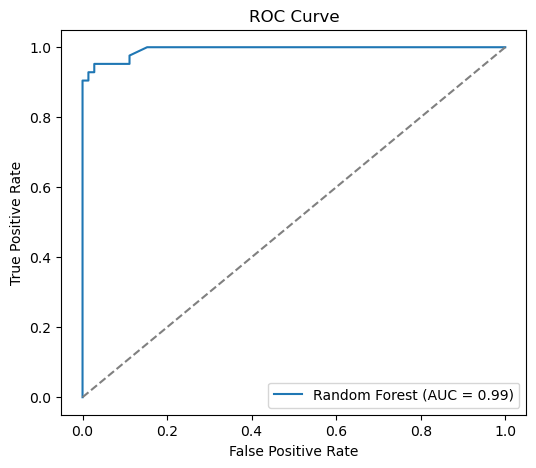

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()